In [1]:
import rlssm
import pandas as pd
import os

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 12].reset_index(drop=True)

data['block_label'] += 1

# data = data[data['trial_block'] == 1]

data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0
1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0
2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0
3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0
4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0
...,...,...,...,...,...,...,...,...,...,...
233,12,3.0,76.0,55.0,40.0,4,2,38.5,0.914431,1.0
234,12,3.0,77.0,52.0,37.0,3,1,38.5,1.276829,1.0
235,12,3.0,78.0,49.0,48.0,4,3,40.0,1.299635,1.0
236,12,3.0,79.0,34.0,33.0,2,1,39.0,1.116690,1.0


In [29]:
model = rlssm.RLARDModel_2A(2,
                           separate_learning_rates=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7ce1dcc58339c30d1bfeedad678d7205 NOW.


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLARDM_2A', 'RLARDM_2A', 1)

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)

In [6]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      thin = n_thin,
                      iter = n_iter,
                      chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
140.0 of 140 iterations ended with a divergence (100.0%)
  Try running with larger adapt_delta to remove the divergences
0 of 140 iterations saturated the maximum tree depth of 10 (0.0%)
Chain 0: E-BFMI = 0.006999637874081752
  E-BFMI below 0.2 indicates you may need to reparameterize your model


In [7]:
model_fit.rhat.describe()

,rhat
count,6.000000
mean,14.496855
std,11.780362
min,2.646822
25%,6.554875
50%,10.765577
75%,20.856918
max,33.431144


In [8]:
model_fit.rhat.head()

,rhat,variable
0,2.646822,threshold
1,12.389263,ndt
2,9.141892,v0
3,5.692536,wd
4,23.679470,ws


In [9]:
model_fit.waic

{'lppd': -230.9398349400783,
 'p_waic': 17514.23985940919,
 'waic': 35490.35938869854,
 'waic_se': 1735.4878887958203}

In [10]:
model_fit.samples

,chain,draw,transf_threshold,transf_ndt,transf_v0,transf_wd,transf_ws,transf_alpha
0,0,14,1.836395,1.038446,0.670079,0.567871,0.116490,0.249079
1,0,62,1.845472,1.036441,0.673877,0.528618,0.107489,0.250865
2,0,22,1.836591,1.038532,0.671366,0.559223,0.114331,0.250159
3,0,10,1.839662,1.039859,0.669068,0.571650,0.116937,0.249250
4,0,2,1.838190,1.039024,0.670034,0.576009,0.117929,0.246874
...,...,...,...,...,...,...,...,...
135,1,32,1.668480,0.619535,1.065593,0.336427,0.010007,0.011090
136,1,67,1.702099,0.626051,1.039958,0.323031,0.011048,0.011097
137,1,26,1.548712,0.659376,1.063680,0.373337,0.010299,0.009089
138,1,3,1.553410,0.593951,0.953637,0.374990,0.008892,0.008166


In [11]:
model_fit.trial_samples

OrderedDict([('drift_cor_t',
              array([[ 4.74721588,  4.74721588,  7.41657061, ..., 15.00186166,
                      12.11802103, 11.35203775],
                     [ 4.43599671,  4.43599671,  6.92604981, ..., 13.91745555,
                      11.25942622, 10.54316638],
                     [ 4.67294581,  4.67294581,  7.30794759, ..., 14.74576506,
                      11.91628524, 11.15942268],
                     ...,
                     [ 1.42415355,  1.42415355,  1.45625996, ...,  2.29599907,
                       2.19417406,  2.19356414],
                     [ 1.26484789,  1.26484789,  1.29319248, ...,  2.01977797,
                       1.93695733,  1.93685457],
                     [ 1.44404645,  1.44404645,  1.47811224, ...,  2.35580565,
                       2.25123795,  2.25059787]])),
             ('drift_inc_t',
              array([[ 4.74721588,  4.74721588,  5.15345903, ..., 10.77400446,
                       6.83597129,  7.10274483],
                 

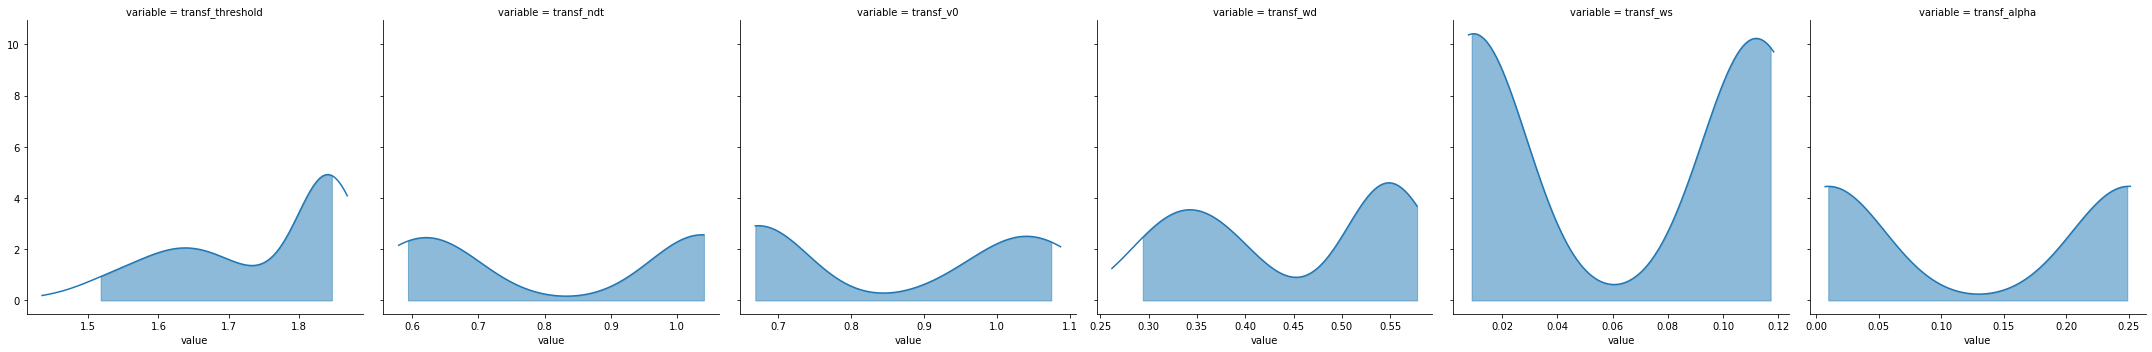

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [13]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.412446  1.352446  1.302446  1.243446  1.153446  1.229446   
2         1.325441  1.384441  1.330441  1.158441  1.224441  1.215441   
3         1.423532  1.318532  1.263532  1.314532  1.213532  1.293532   
4         1.339859  1.232859  1.323859  1.304859  1.237859  1.228859   
5         1.580024  1.287024  1.212024  1.338024  1.174024  1.258024   
...            ...       ...       ...       ...       ...       ...   
96        0.864542  1.458542  1.338542  1.775542  1.200542  1.951542   
97        1.489937  1.513937  1.473937  0.856937  0.985937  1.661937   
98        1.628273  1.467273  1.192273  1.026273  1.115273  1.730273   
99        1.302620  1.436620  1.291620  1.521620  1.384620  1.063620   
100       1.044693  1.495693  4.293693  0.904693  1.053693  2.194693   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      229  230  231  232   
sample                                            ...                           
1         1.243446  1.149446  1.174446  1.170446  ...      1.0  1.0  1.0  1.0   
2         1.181441  1.204441  1.247441  1.148441  ...      1.0  1.0  1.0  1.0   
3         1.190532  1.215532  1.230532  1.117532  ...      1.0  1.0  0.0  1.0   
4         1.152859  1.177859  1.179859  1.166859  ...      1.0  1.0  1.0  1.0   
5         1.182024  1.148024  1.195024  1.145024  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.009542  1.628542  0.889542  1.362542  ...      0.0  1.0  0.0  1.0   
97        1.476937  2.120937  1.106937  1.994937  ...      1.0  0.0  0.0  1.0   
98        1.024273  1.569273  1.597273  0.924273  ...      1.0  1.0  1.0  1.0   
99        1.515620  1.008620  1.589620  1.444620  ...      1.0  1.0  0.0  1.0   
100       1.241693  1.633693  1.165693  1.799693  ...      1.0  1.0  0.0  1.0   

variable                                
trial     233  234  235  236  237  238  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  0.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  0.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  0.0  1.0  1.0  
99        1.0  1.0  1.0  0.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  0.0  

[100 rows x 476 columns]

In [14]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.886555,1.163799,1.806373,1.160046,1.168246,1.177446,1.200446,1.267046,1.121446,1.138446,1.149446,1.168446,1.213446
2,0.915966,1.168285,2.375155,1.137841,1.166841,1.198441,1.205741,1.222141,1.128541,1.140541,1.158941,1.177341,1.215741
3,0.920168,1.163007,1.515046,1.152532,1.163332,1.175532,1.195332,1.247532,1.124532,1.139532,1.153532,1.171532,1.208932
4,0.907563,1.163665,2.529818,1.146059,1.173659,1.189359,1.207659,1.247859,1.123859,1.138859,1.150859,1.172859,1.207859
5,0.936975,1.160675,2.753701,1.151624,1.173824,1.185024,1.221824,1.261024,1.121224,1.137024,1.151024,1.168024,1.200824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.672269,1.283651,1.663472,0.920342,1.055442,1.202042,1.470642,1.932642,0.934442,1.074342,1.175042,1.350042,1.666842
97,0.731092,1.323021,1.562563,0.949737,1.111837,1.259937,1.366137,1.722137,0.958937,1.117437,1.228437,1.409237,1.849437
98,0.777311,1.349676,1.767628,1.066873,1.167473,1.387273,1.507473,2.160673,0.935073,1.105073,1.232273,1.388873,1.752273


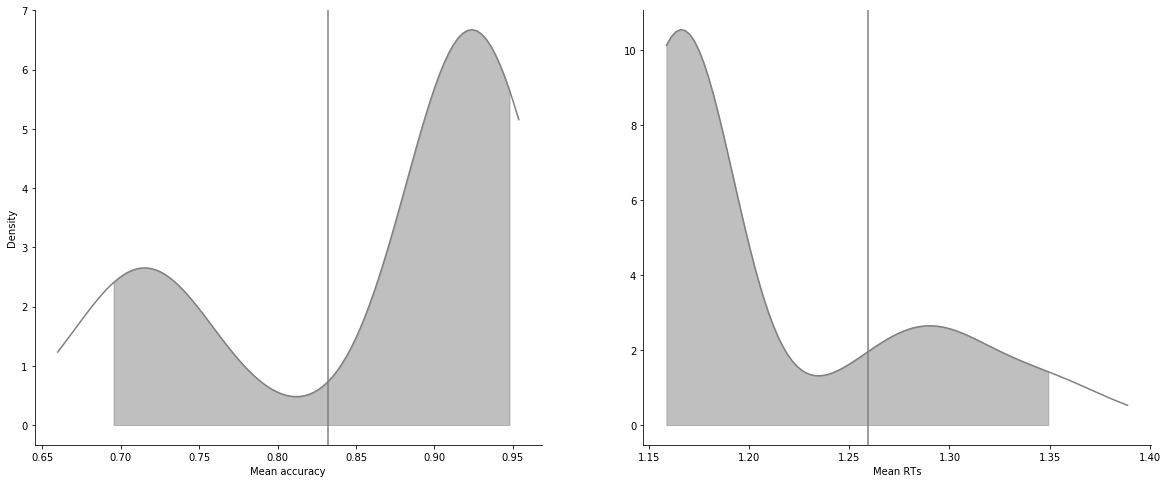

In [15]:
g = model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI')

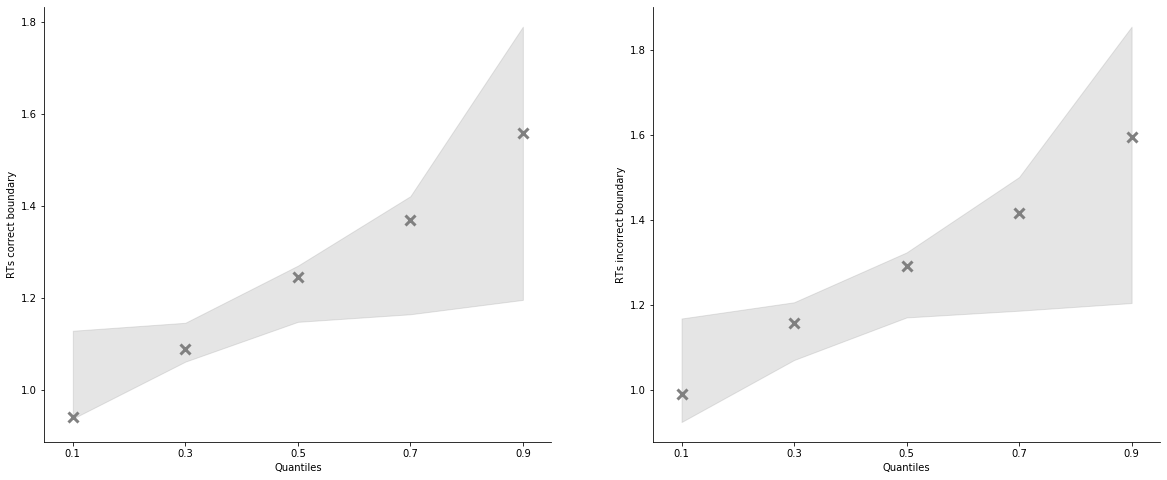

In [16]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [17]:
import numpy as np

In [18]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [19]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0,2,BD,1
1,1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0,1,AC,1
2,2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0,1,BD,1
3,3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0,1,AC,1
4,4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0,1,BD,1


In [20]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.947368  1.200709  0.435050   
                        2            0.842105  1.211283  0.578786   
                        3            0.947368  1.200321 -0.463886   
                        4            0.947368  1.190069 -0.037487   
                        5            0.842105  1.186550  0.974489   
...                                       ...       ...       ...   
3.0         CD          96           0.400000  1.259942  1.204002   
                        97           0.600000  1.262837  1.504366   
                        98           0.500000  1.324223  0.543477   
                        99           0.650000  1.353470  0.934393   
                        100          0.350000  1.292493  3.654246   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.196446             1.179646   
                        2                    1.226441             1.188941   
                        3                    1.202532             1.185632   
                        4                    1.222859             1.164959   
                        5                    1.181424             1.174024   
...                                               ...                  ...   
3.0         CD          96                   1.060542             1.108342   
                        97                   1.097837             1.125737   
                        98                   1.059173             1.086273   
                        99                   1.118220             1.127020   
                        100                  1.190093             1.113293   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.196446             1.199446   
                        2                    1.240441             1.194441   
                        3                    1.202532             1.200032   
                        4                    1.222859             1.184359   
                        5                    1.183024             1.182524   
...                                               ...                  ...   
3.0         CD          96                   1.180542             1.225542   
                        97                   1.183437             1.273937   
                        98                   1.446773             1.199773   
                        99                   1.455620             1.154620   
                        100                  1.258693             1.209693   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.196446             1.218546  
                        2                    1.255641             1.208941  
                        3                    1.202532             1.224132  
                        4                    1.222859             1.212759  
                        5                    1.185024             1.196024  
...                                               ...                  ...  
3.0         CD          96                   1.361942             1.273442  
                        97                   1.263637             1.345437  
                        98                   1.750173             1.313473  
                        99                   1.673420             1.353020  
                        100                  1.303493             1.250093  

[1200 rows x 9 columns]

In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.766667  1.185313  0.718293               1.179246   
           2            0.766667  1.203541  4.369295               1.156841   
           3            0.766667  1.187799  1.097498               1.198732   
           4            0.900000  1.203492  2.960085               1.158059   
           5            0.900000  1.205157  2.879108               1.154424   
...                          ...       ...       ...                    ...   
8          96           0.785714  1.160792  0.362029               1.118042   
           97           0.785714  1.225544  0.402957               1.029437   
           98           0.821429  1.257809  0.827302               1.329073   
           99           0.857143  1.141406 -0.050210               1.199020   
           100          0.785714  1.304050  1.609268               1.020193   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.147046               1.189446   
           2                  1.164041               1.186441   
           3                  1.150132               1.210532   
           4                  1.166659               1.166859   
           5                  1.170024               1.156024   
...                                ...                    ...   
8          96                 1.024742               1.238042   
           97                 1.118237               1.200437   
           98                 1.109473               1.420273   
           99                 1.029320               1.222620   
           100                1.118993               1.111193   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.168446               1.202246   
           2                  1.180441               1.188841   
           3                  1.167532               1.229332   
           4                  1.181859               1.301659   
           5                  1.186024               1.171224   
...                                ...                    ...   
8          96                 1.088042               1.290042   
           97                 1.175937               1.346937   
           98                 1.147273               1.579473   
           99                 1.115620               1.254920   
           100                1.178693               1.286693   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.216246  
           2                  1.196241  
           3                  1.181532  
           4                  1.199259  
           5                  1.203224  
...                                ...  
8          96                 1.280242  
           97                 1.300137  
           98                 1.314273  
           99                 1.216820  
           100                1.262793  

[800 rows x 9 columns]

In [22]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0,2,BD,1
1,1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0,1,AC,1
2,2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0,1,BD,1
3,3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0,1,AC,1
4,4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0,1,BD,1


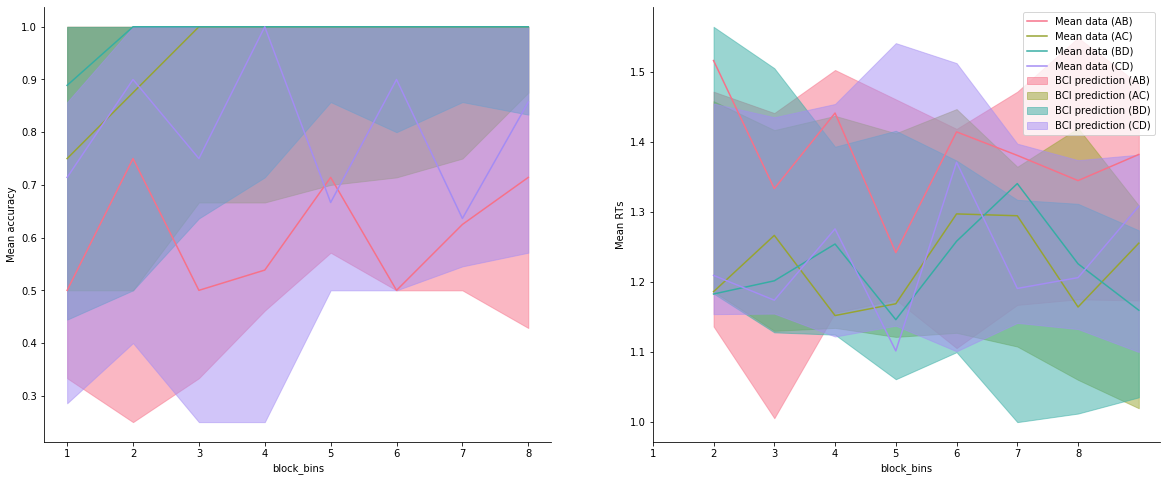

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

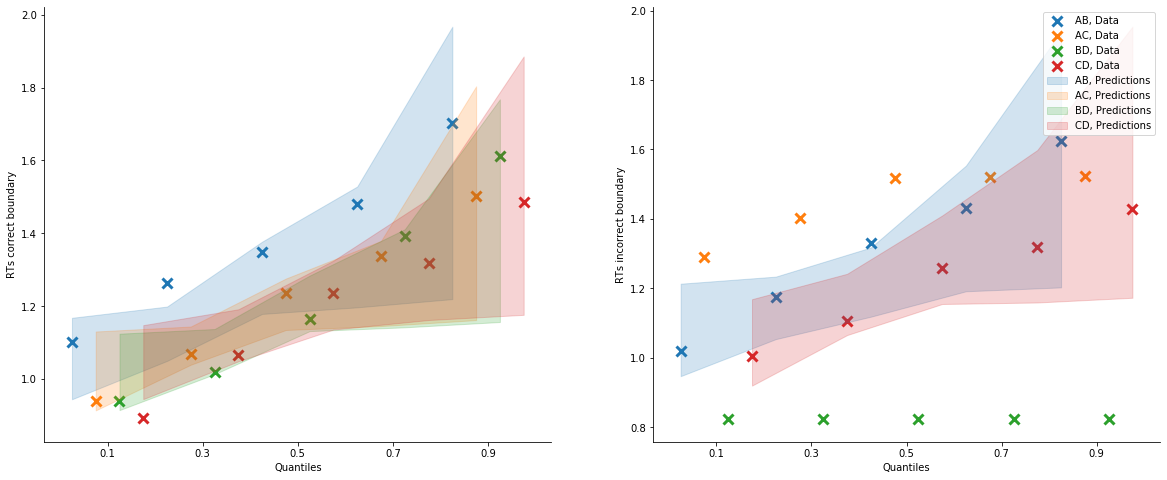

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [25]:
import seaborn as sns

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/fits_race.py:242: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


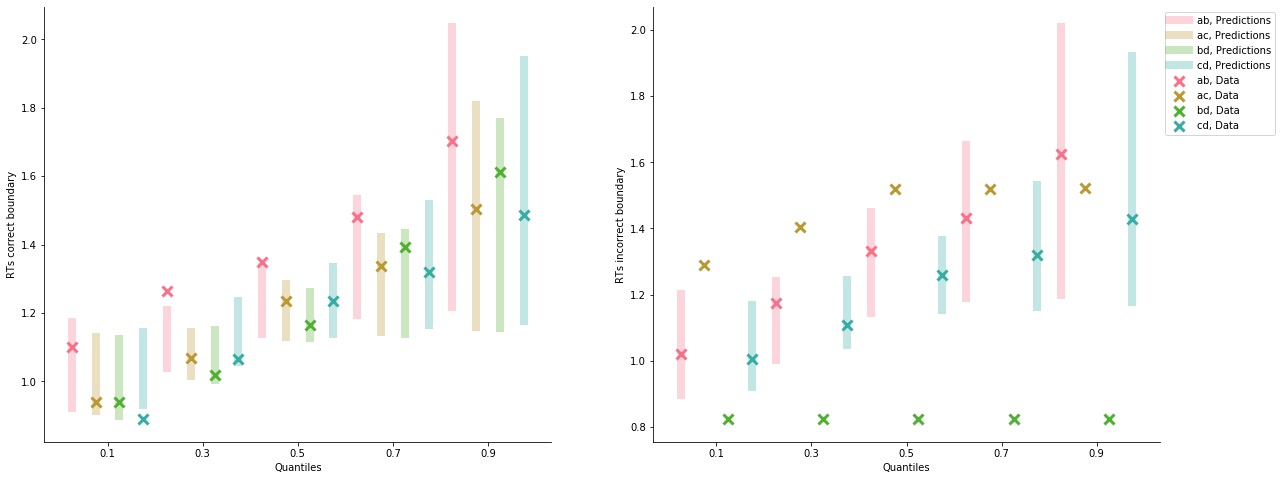

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);

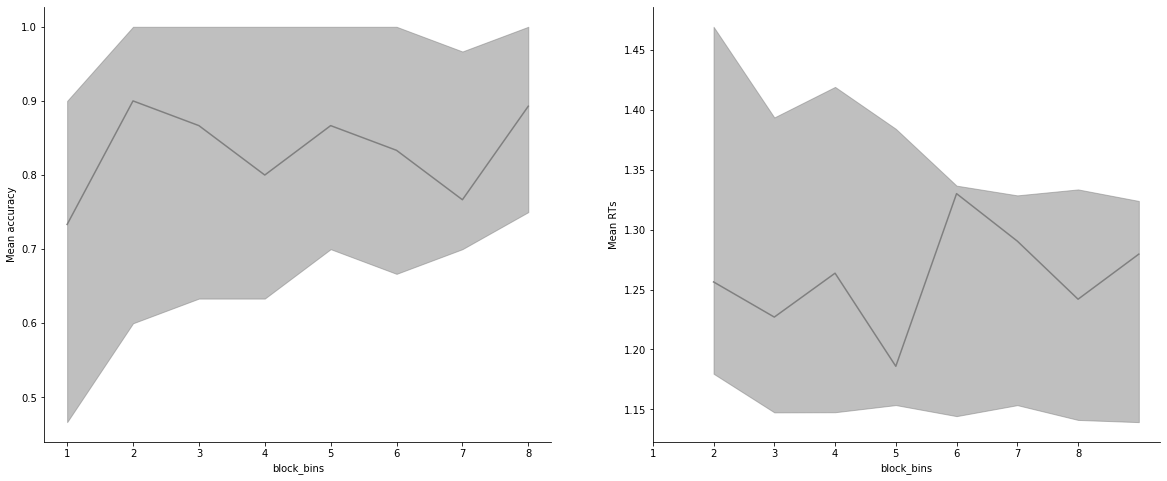

In [27]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=100,
    figsize=(20,8));